In [1]:
import Ramsey_ExperimentV3

import estimator
import numpy as np

In [24]:
from tqdm import tqdm
import random

T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 10000
errors_fisher = []
errors_local = []
uniform_local = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

repetitions = 200
# W =]
Decay = np.arange(0.001,2, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay],
                                                                                                  W, J)

        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        batch_uni_det, batch_uni_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, uni_delay, [decay], W, J)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_uni_det, batch_uni_cross)

        # rep_error_fisher.append(estimator.percent_error(np.concatenate([[decay],W, J_list]),
        #                                                 np.concatenate([Decay_fisher,W_fisher, J_fisher])))
        # rep_error_local.append(estimator.percent_error(np.concatenate([[decay],W, J_list]),
        #                                                np.concatenate([Decay_local,W_local, J_local])))
        # rep_error_uniform.append(estimator.percent_error(np.concatenate([[decay],W, J_list]),
        #                                                  np.concatenate([Decay_uni,W_uni, J_uni])))

        rep_error_fisher.append(estimator.percent_error(np.concatenate([W, J_list]),
                                                        np.concatenate([W_fisher, J_fisher])))
        rep_error_local.append(estimator.percent_error(np.concatenate([W, J_list]),
                                                       np.concatenate([W_local, J_local])))
        rep_error_uniform.append(estimator.percent_error(np.concatenate([W, J_list]),
                                                         np.concatenate([W_uni, J_uni])))

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)


Repetition 199: 100%|██████████| 20/20 [00:02<00:00,  7.96it/s]


In [25]:
errors_fisher_reshaped = list(map(list, zip(*errors_fisher)))
errors_fisher_median = [np.median(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]
errors_fisher_std = [np.std(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]
errors_fisher_75th_percentile = [np.percentile(np.array(errors_fisher_reshaped[i]), 75) for i in range(len(errors_fisher_reshaped))]

errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median = [np.median(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]
errors_local_std = [np.std(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]
errors_local_75th_percentile = [np.percentile(np.array(errors_local_reshaped[i]), 75) for i in range(len(errors_local_reshaped))]

errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
errors_uniform_median = [np.median(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]
errors_uniform_std = [np.std(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]
errors_uniform_75th_percentile = [np.percentile(np.array(errors_uniform_reshaped[i]), 75) for i in range(len(errors_uniform_reshaped))]


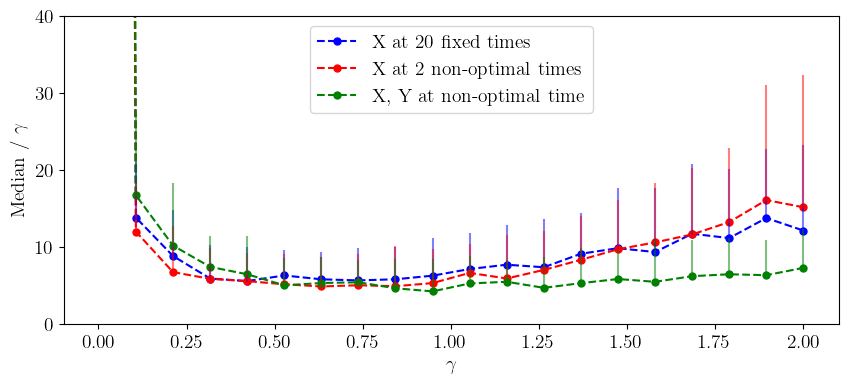

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
plt.plot(Decay, 100 * np.array(errors_uniform_median / Decay), linestyle='--', marker='o', color='blue', markersize=5,
         label='X at 20 fixed times')
plt.plot(Decay, 100 * np.array(errors_fisher_median / Decay), linestyle='--', marker='o', color='red', markersize=5,
         label='X at 2 non-optimal times')
plt.plot(Decay, 100 * np.array(errors_local_median / Decay), linestyle='--', marker='o', color='green', markersize=5,
         label='X, Y at non-optimal time')

# plt.errorbar(Decay, 100 * np.array(errors_uniform_median / Decay), yerr=100 * np.array(errors_uniform_std/Decay ),
#              fmt='o', color='blue')
# plt.errorbar(Decay, 100 * np.array(errors_fisher_median / Decay), yerr=100 * np.array(errors_fisher_std/Decay ),
#              fmt='o', color='red')
# plt.errorbar(Decay, 100 * np.array(errors_local_median / Decay), yerr=100 * np.array(errors_local_std/Decay ), fmt='o',
#              color='green')

# Add lines connecting median to 75th percentile for each dataset
for i, decay_value in enumerate(Decay):
    # Uniform
    plt.plot([decay_value, decay_value],
             [100 * errors_uniform_median[i] / decay_value, 100 * errors_uniform_75th_percentile[i] / decay_value],
             color='blue', linestyle='-', alpha=0.5)

    # Fisher
    plt.plot([decay_value, decay_value],
             [100 * errors_fisher_median[i] / decay_value, 100 * errors_fisher_75th_percentile[i] / decay_value],
             color='red', linestyle='-', alpha=0.5)

    # Local
    plt.plot([decay_value, decay_value],
             [100 * errors_local_median[i] / decay_value, 100 * errors_local_75th_percentile[i] / decay_value],
             color='green', linestyle='-', alpha=0.5)

# Scatter points for 75th percentiles
# plt.scatter(Decay, 100 * np.array(errors_uniform_75th_percentile / Decay), color='blue', alpha=0.5)
# plt.scatter(Decay, 100 * np.array(errors_fisher_75th_percentile / Decay), color='red', alpha=0.5)
# plt.scatter(Decay, 100 * np.array(errors_local_75th_percentile / Decay), color='green', alpha=0.5)



# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.ylim([0, 40])
plt.grid()
plt.legend()

Decay:  0.9478947368421052
mean:  4.272994950588689
IQR:  6.2557467355387315
std:  4.481422500418987


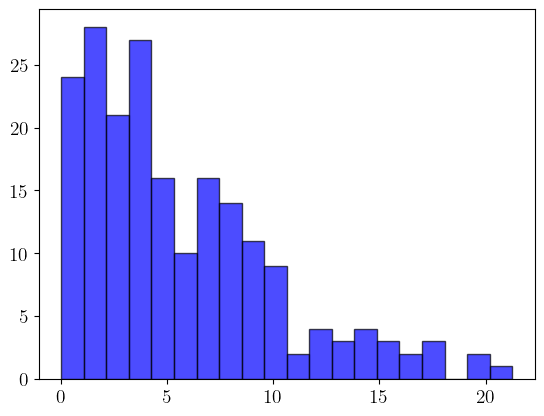

In [27]:
index = 9
print("Decay: ",Decay[index])
X = 100 * np.array(errors_local_reshaped[index] / Decay[index])

#plot histogram with 10 bins
plt.hist(X, bins=20, color='blue', edgecolor='black', alpha=0.7)
q75, q25 = np.percentile(X, [75, 25])
iqr = q75 - q25
print("mean: ",np.median(X))
print("IQR: ", iqr)
print("std: ", np.std(X))

In [31]:
import pandas as pd

results_df = pd.DataFrame({
    "shots": shots,
    "errors_fisher_median": errors_fisher_median,
    "errors_fisher_75th_percentile": errors_fisher_75th_percentile,
    "errors_local_median": errors_local_median,
    "errors_local_75th_percentile": errors_local_75th_percentile,
    "errors_uniform_median": errors_uniform_median,
    "errors_uniform_75th_percentile": errors_uniform_75th_percentile
})

# Saving to Excel
results_df.to_excel('C:\Projects\Crosstalk\data_for_paper/stability-Decay.xlsx', index=False)

In [32]:
import numpy as np
import pandas as pd

Decay = np.linspace(0.001, 3, 26)

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/stability-Decay.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_75th_percentile = loaded_df["errors_fisher_75th_percentile"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_75th_percentile = loaded_df["errors_local_75th_percentile"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_75th_percentile = loaded_df["errors_uniform_75th_percentile"].values